In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Handle categorical data

In [3]:
categorical_cols = df.select_dtypes(include = ['object']).columns.to_list()
print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [4]:
ordinal_encoder = OrdinalEncoder()
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical_cols, columns=categorical_cols)
numerical_df = df.drop(categorical_cols, axis =1)
encoded_df = pd.concat([numerical_df, encoded_categorical_df], axis= 1)

In [5]:
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
normalizer = StandardScaler()
dataset_arr = normalizer.fit_transform(encoded_df)

In [7]:
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

In [8]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size= test_size,
    random_state=random_state,
    shuffle= is_shuffle
)

RandomForestRegessor

In [9]:
regessor = RandomForestRegressor(random_state=random_state)
regessor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [10]:
y_pred = regessor.predict(X_val)

In [11]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.46093873321571177
Mean Squared Error: 0.37944418523089524


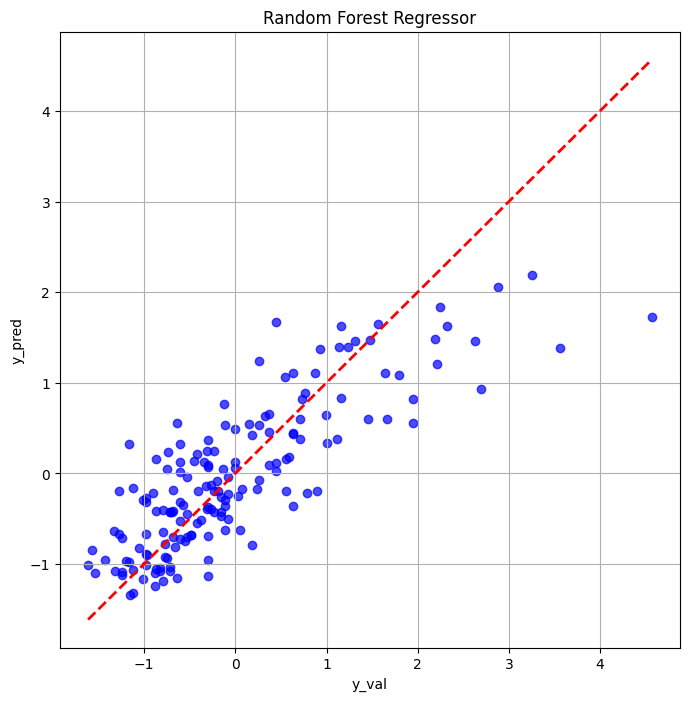

In [12]:
# Create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.7, color='blue')

# Add a reference line for perfect predictions
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', lw=2)

# Add titles and labels
plt.title('Random Forest Regressor')
plt.xlabel('y_val')
plt.ylabel('y_pred')
plt.grid(True)

# Show the plot
plt.show()

AdaBoost

In [22]:
regressor = AdaBoostRegressor(random_state=random_state)
regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [23]:
y_pred = regressor.predict(X_val)

In [24]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.567680019897059
Mean Squared Error: 0.5739244030038942


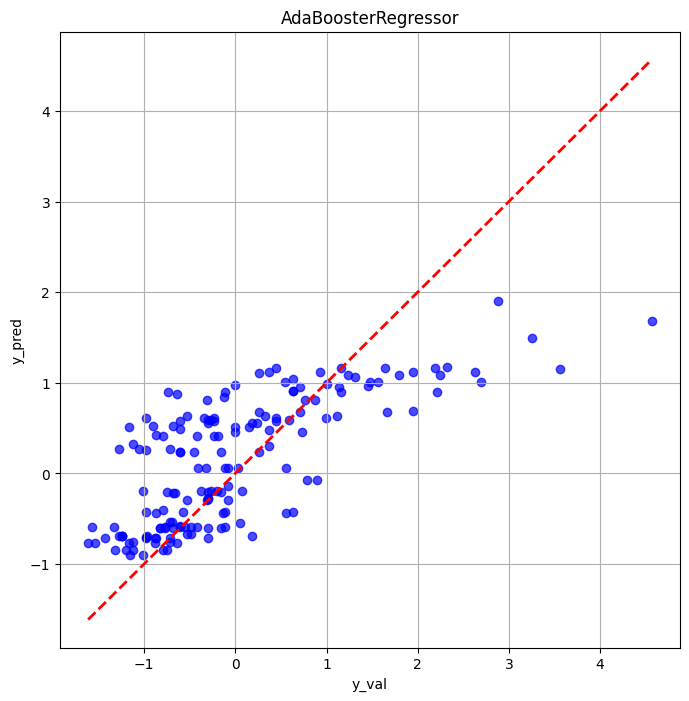

In [25]:
# Create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.7, color='blue')

# Add a reference line for perfect predictions
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', lw=2)

# Add titles and labels
plt.title('AdaBoosterRegressor')
plt.xlabel('y_val')
plt.ylabel('y_pred')
plt.grid(True)

# Show the plot
plt.show()

GradientBoostingResgressor

In [27]:
regressor = GradientBoostingRegressor(random_state=random_state)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [28]:
y_pred = regressor.predict(X_val)

In [29]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

print('Evaluation results on validation set:')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Evaluation results on validation set:
Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


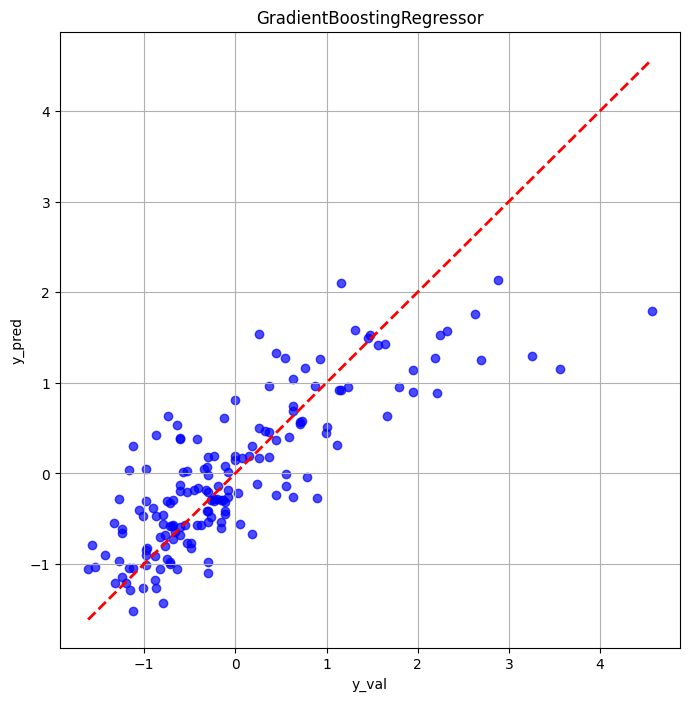

In [30]:
# Create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.7, color='blue')

# Add a reference line for perfect predictions
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r--', lw=2)

# Add titles and labels
plt.title('GradientBoostingRegressor')
plt.xlabel('y_val')
plt.ylabel('y_pred')
plt.grid(True)

# Show the plot
plt.show()